# Feature engineering part 1

In [1]:
# import 
import pandas as pd
from fep import FEP, load_features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
bids = pd.read_csv('../Data/facebook/bids.csv')
bidder = pd.read_csv('../Data/facebook/train.csv')

### train and test set

In [3]:
X_bidder = bidder.drop(['outcome'],axis=1)
y_bidder = bidder['outcome']
X_train, X_test, y_train, y_test = train_test_split(X_bidder, y_bidder, random_state=42, stratify=y_bidder)

In [4]:
df_train = pd.merge(bids, pd.concat([X_train, y_train], axis=1), on='bidder_id', how='inner')  
df_test = pd.merge(bids, pd.concat([X_test, y_test], axis=1), on='bidder_id', how='inner') 

Encoding

In [5]:
unique_bidders = pd.concat([df_train['bidder_id'], df_test['bidder_id']]).unique()
bidder_mapping = {bidder_id: idx for idx, bidder_id in enumerate(unique_bidders)}
df_train['encoded_bidder_id'] = df_train['bidder_id'].map(bidder_mapping)
df_test['encoded_bidder_id'] = df_test['bidder_id'].map(bidder_mapping)

In [6]:
df_train.drop('bidder_id',axis=1,inplace=True)
df_test.drop('bidder_id',axis=1,inplace=True)

### Extract auction_count and device_count


In [7]:
def count_for_bidder(bidder_id, feature, df):
    return df[df['encoded_bidder_id'] == bidder_id][feature].nunique()

bidders = pd.DataFrame(df_train['encoded_bidder_id'].unique(), columns=['encoded_bidder_id'])

features = ['auction', 'device', 'bid_id', 'ip', 'url']

for feature in features:
    bidders[feature + '_count'] = bidders['encoded_bidder_id'].apply(lambda bidder: count_for_bidder(bidder, feature, df_train))

bidders


,encoded_bidder_id,auction_count,device_count,bid_id_count,ip_count,url_count
0,0,594,1029,19988,10316,4527
1,1,787,403,30062,20492,295
2,2,748,2020,192565,53405,36518
3,3,162,367,9108,6046,1886
4,4,963,1610,84319,27560,13416
...,...,...,...,...,...,...
1482,1482,1,1,1,1,1
1483,1483,1,2,2,2,2
1484,1484,1,1,1,1,1
1485,1485,1,1,1,1,1


In [8]:
bidders['bid_auction'] = bidders['bid_id_count']/bidders['auction_count']
bidders.head(10)

,encoded_bidder_id,auction_count,device_count,bid_id_count,ip_count,url_count,bid_auction
0,0,594,1029,19988,10316,4527,33.649832
1,1,787,403,30062,20492,295,38.198221
2,2,748,2020,192565,53405,36518,257.439840
3,3,162,367,9108,6046,1886,56.222222
4,4,963,1610,84319,27560,13416,87.558671
5,5,376,528,6355,4870,248,16.901596
6,6,199,315,2390,963,1691,12.010050
7,7,251,425,5189,1494,1140,20.673307
8,8,208,386,4429,2705,1478,21.293269
9,9,681,986,29146,21502,1672,42.798825


Features:
- auction_count: Total number of auctions in which the bidder placed a bid
- device_count: Total number of devices that the bidder used
- bid_id_count: Total number of bid placed by the bidder
- url_count: total number of URLs related to the bidder
- ip_count: total number of ips related to the bidder

In [11]:
bidders['bid_per_device'] = bidders['bid_id_count'] / bidders['device_count']
bidders['bid_per_device'] = bidders['bid_per_device'].fillna(0) #handling potential division by zero or missing values
bidders

,encoded_bidder_id,auction_count,device_count,bid_id_count,ip_count,url_count,bid_auction,bid_per_device
0,0,594,1029,19988,10316,4527,33.649832,19.424684
1,1,787,403,30062,20492,295,38.198221,74.595533
2,2,748,2020,192565,53405,36518,257.439840,95.329208
3,3,162,367,9108,6046,1886,56.222222,24.817439
4,4,963,1610,84319,27560,13416,87.558671,52.372050
...,...,...,...,...,...,...,...,...
1482,1482,1,1,1,1,1,1.000000,1.000000
1483,1483,1,2,2,2,2,2.000000,1.000000
1484,1484,1,1,1,1,1,1.000000,1.000000
1485,1485,1,1,1,1,1,1.000000,1.000000


In [ ]:
swag = pd.merge(df_train, bidders, on='encoded_bidder_id', how='inner')

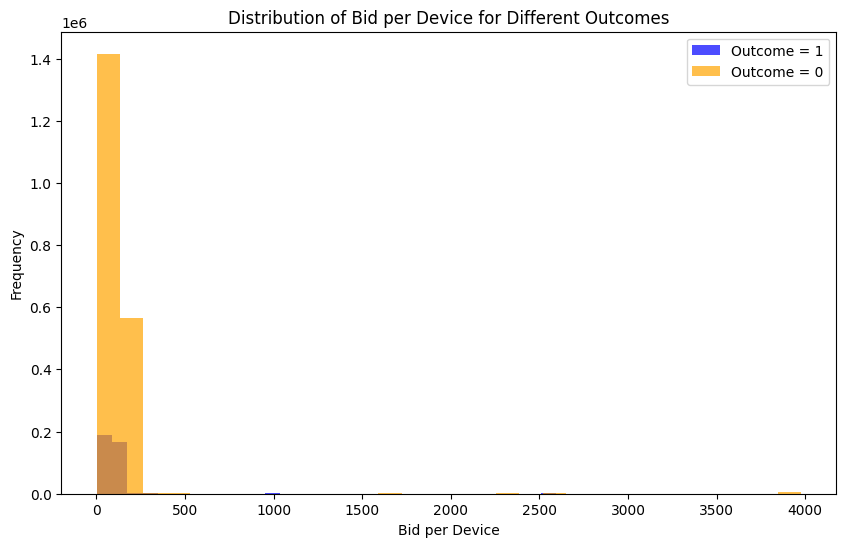

In [32]:
import matplotlib.pyplot as plt


outcome_1 = swag[swag['outcome'] == 1]['bid_per_device']
outcome_0 = swag[swag['outcome'] == 0]['bid_per_device']


plt.figure(figsize=(10, 6))


plt.hist(outcome_1, bins=30, alpha=0.7, label='Outcome = 1', color='blue')


plt.hist(outcome_0, bins=30, alpha=0.7, label='Outcome = 0', color='orange')


plt.xlabel('Bid per Device')
plt.ylabel('Frequency')
plt.title('Distribution of Bid per Device for Different Outcomes')
plt.legend()


plt.show()

